In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RAW_DATA = pd.read_csv("decay_data/tri_decay.csv")[:96]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


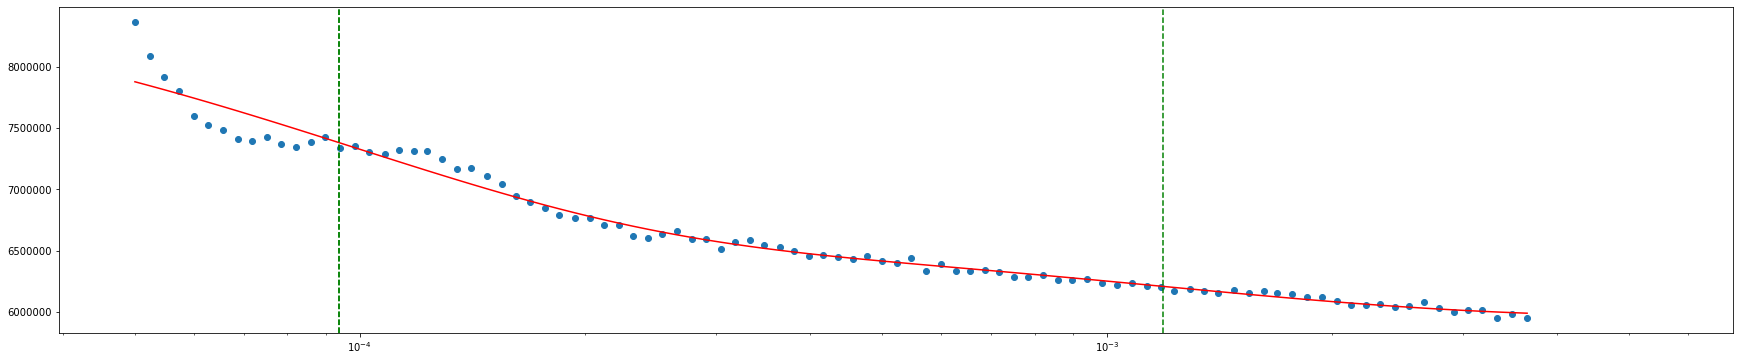

In [31]:

Tau = RAW_DATA["TAU"]
Intensity = RAW_DATA["INTENSITY"]


def bi_exp(t, S1, T1_1, S2, T1_2, S3, T1_3, C):
    return S1 * np.exp(-t / T1_1) + S2 * np.exp(-t/T1_2) + S3 * np.exp(-t/T1_3) + C


from scipy.optimize import curve_fit

init_cond = [ Intensity[0], 0.05, Intensity[0], 0.0002, Intensity[0], 0.00005, Intensity[len(Intensity) - 1] ]

params, covar = curve_fit(bi_exp, Tau, Intensity, p0=init_cond)



fitted_curve = bi_exp(Tau, *params)


S1, T1_1, S2, T1_2, S3, T1_3, C = params



plt.figure(figsize=(30, 6))
plt.scatter(Tau, Intensity)
plt.plot(Tau, fitted_curve, color='r')
plt.xscale("log")


plt.axvline(x=T1_1, color='g', linestyle="--")
plt.axvline(x=T1_2, color='g', linestyle='--')
plt.axvline(x=T1_3, color='g', linestyle='--')

plt.show()




In [ ]:
Tau = RAW_DATA["TAU"]
Intensity = RAW_DATA["INTENSITY"]


def bi_exp(t, S1, T1_1, S2, T1_2, S3, T1_3, C):
    return S1 * np.exp(-t / T1_1) + S2 * np.exp(-t/T1_2) + S3 * np.exp(-t/T1_3) + C


from scipy.optimize import curve_fit

init_cond = [ Intensity[0], 0.005, Intensity[0], 0.0002, Intensity[0], 0.00005, Intensity[len(Intensity) - 1] ]

params, covar = curve_fit(bi_exp, Tau, Intensity, p0=init_cond)



fitted_curve = bi_exp(Tau, *params)


S1, T1_1, S2, T1_2, S3, T1_3, C = params



plt.figure(figsize=(30, 6))
plt.scatter(Tau, Intensity)
plt.plot(Tau, fitted_curve, color='r')
plt.xscale("log")


plt.axvline(x=T1_1, color='g', linestyle="--")
plt.axvline(x=T1_2, color='g', linestyle='--')
plt.axvline(x=T1_3, color='g', linestyle='--')

plt.show()



0.00023419589871327283 1.9724837933336485e-06 1.2662279928442932e-05


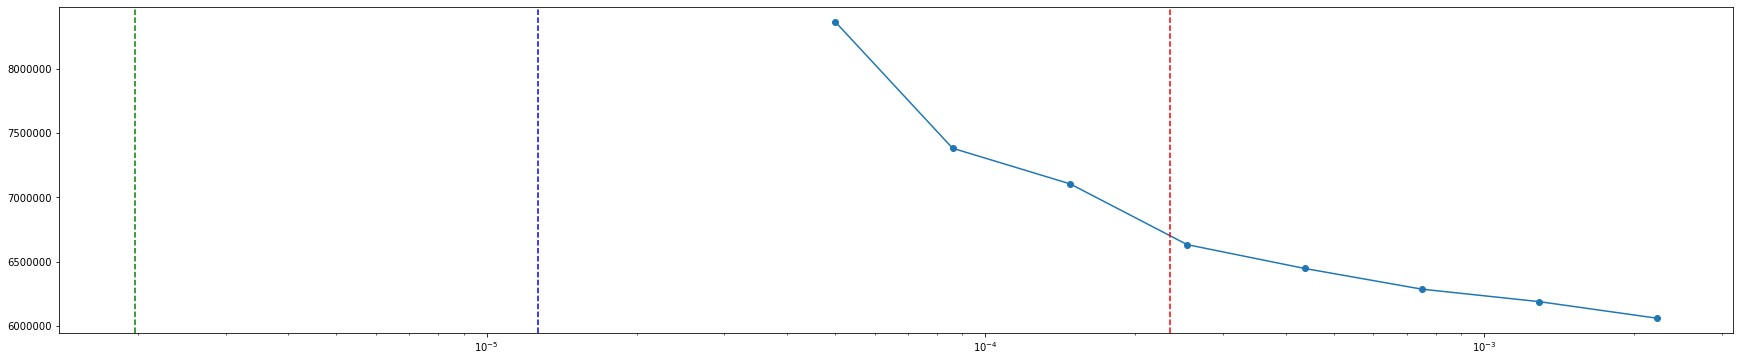

In [63]:
selected_points = RAW_DATA.iloc[::len(RAW_DATA)//8].reset_index(drop=True)
iter1_tau, iter1_int = selected_points["TAU"], selected_points["INTENSITY"]



init_cond = [ iter1_int[0], 0.0005, iter1_int[0], 0.0002, iter1_int[0], 0.00005, iter1_int[7] ]


params1, covar1 = curve_fit(bi_exp, iter1_tau, iter1_int, p0=init_cond, maxfev=5000)


S1, T1_1, S2, T1_2, S3, T1_3, C = params1

plt.figure(figsize=(30, 6))
plt.plot(iter1_tau, iter1_int, marker='o')
plt.xscale("log")



plt.axvline(x=T1_1, color='r', linestyle="--")
plt.axvline(x=T1_2, color='g', linestyle='--')
plt.axvline(x=T1_3, color='b', linestyle='--')



plt.show()

In [67]:
# Function to find the closest value
def find_closest(tau_value, dataframe):
    absolute_differences = (dataframe["TAU"] - tau_value).abs()
    closest_index = absolute_differences.idxmin()
    return dataframe.loc[closest_index]

# Find the closest TAU and corresponding INTENSITY for each T1_x
closest_to_T1_1 = find_closest(T1_1, RAW_DATA)
closest_to_T1_2 = find_closest(T1_2, RAW_DATA)
closest_to_T1_3 = find_closest(T1_3, RAW_DATA)

# The result will be three rows from the DataFrame, each representing the closest match
closest_to_T1_1, closest_to_T1_2, closest_to_T1_3

# Append these points to the selected_points DataFrame
selected_points_extended = selected_points.append([closest_to_T1_1, closest_to_T1_2, closest_to_T1_3], ignore_index=True)

# Resetting the index to avoid duplication in index values
selected_points_extended.reset_index(drop=True, inplace=True)

selected_points_extended.drop_duplicates(subset='TAU', keep='first', inplace=True)



<ipython-input-67-70aaa23eea77>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_points_extended = selected_points.append([closest_to_T1_1, closest_to_T1_2, closest_to_T1_3], ignore_index=True)


TAU    INTENSITY
0  0.000050  8367597.520
1  0.000086  7382333.141
2  0.000148  7104591.838
3  0.000254  6631820.498
4  0.000437  6446322.467
5  0.000751  6284983.543
6  0.001290  6188000.566
7  0.002220  6059214.703
8  0.000232  6618917.844

        TAU    INTENSITY
0  0.000050  8367597.520
1  0.000086  7382333.141
2  0.000148  7104591.838
3  0.000232  6618917.844
4  0.000254  6631820.498
5  0.000437  6446322.467
6  0.000751  6284983.543
7  0.001290  6188000.566
8  0.002220  6059214.703


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


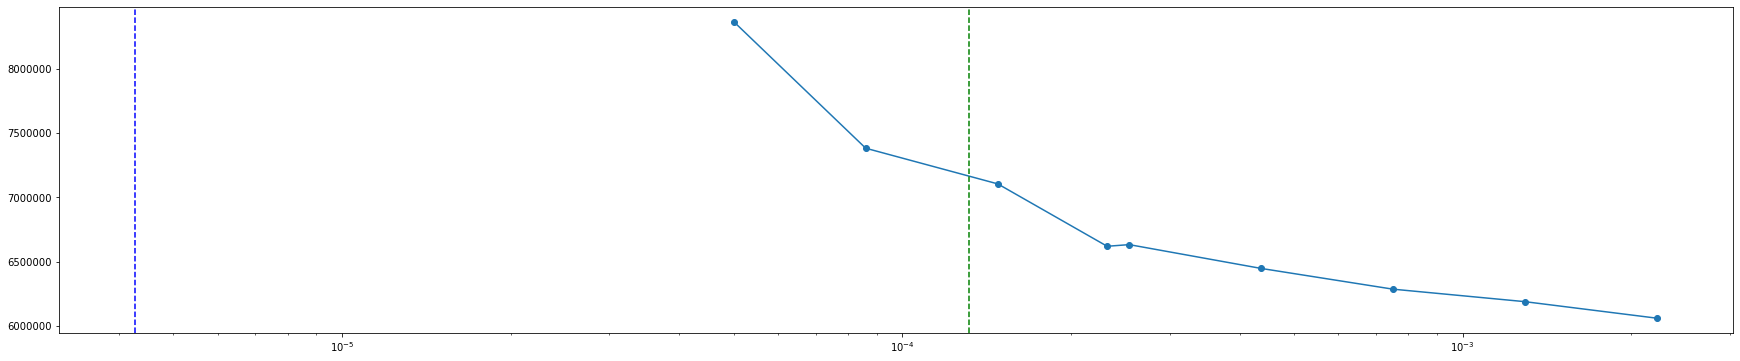

In [77]:
selected_points_extended = selected_points_extended.sort_values(by='TAU', ascending=True)

selected_points_extended.reset_index(drop=True, inplace=True)


iter2_tau, iter2_int = selected_points_extended["TAU"], selected_points_extended["INTENSITY"]


init_cond = [ iter2_int[0], 0.005, iter2_int[0], 0.0002, iter2_int[0], 0.00005, iter2_int[len(iter2_int) - 1] ]

# This originally failed, so I had to adjust the starting condition
params2, covar2 = curve_fit(bi_exp, iter2_tau, iter2_int, p0=init_cond, maxfev=5000)


S1, T1_1, S2, T1_2, S3, T1_3, C = params2

print(selected_points_extended)

plt.figure(figsize=(30, 6))
plt.plot(iter2_tau, iter2_int, marker='o')
plt.xscale("log")



plt.axvline(x=T1_1, color='r', linestyle="--")
plt.axvline(x=T1_2, color='g', linestyle='--')
plt.axvline(x=T1_3, color='b', linestyle='--')



plt.show()